# Project: Heart Disease Analysis: Understanding Key Risk Indicators

## Problem Statement:
Heart disease is one of the leading causes of death worldwide. Identifying risk factors
and understanding their impact can help develop strategies for early detection and
prevention. This project aims to analyze a dataset of heart disease patients to explore
patterns and correlations among key health indicators, such as cholesterol levels, blood
pressure, and age, to determine their relationship with heart disease.

Dataset source:https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [ ]:
# Column Descriptions

# id (Unique id for each patient)
# age (Age of the patient in years)
# origin (place of study)
# sex (Male/Female)
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# chol (serum cholesterol in mg/dl)
# fbs (if fasting blood sugar > 120 mg/dl)
# restecg (resting electrocardiographic results)
# -- Values: [normal, stt abnormality, lv hypertrophy]
# thalach: maximum heart rate achieved
# exang: exercise-induced angina (True/ False)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by fluoroscopy
# thal: [normal; fixed defect; reversible defect]
# num: the predicted attribute (target variable)

In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("heart_disease_uci.csv")

In [20]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
# To find the number of rows and columns of dataset
df.shape

(920, 16)

In [22]:
# To find the column names and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [23]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame for easier reading
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort by percentage of missing values (descending order)
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)

print(missing_summary)

          Missing Values  Percentage
ca                   611   66.413043
thal                 486   52.826087
slope                309   33.586957
fbs                   90    9.782609
oldpeak               62    6.739130
trestbps              59    6.413043
thalch                55    5.978261
exang                 55    5.978261
chol                  30    3.260870
restecg                2    0.217391
id                     0    0.000000
age                    0    0.000000
sex                    0    0.000000
dataset                0    0.000000
cp                     0    0.000000
num                    0    0.000000


In [24]:
# Drop columns with >50% missing values
columns_to_drop = ['ca', 'thal']
df = df.drop(columns=columns_to_drop)

# Impute columns with moderate or low missing percentages
from sklearn.impute import SimpleImputer

# Define imputers
median_imputer = SimpleImputer(strategy='median')  # For numerical columns
mode_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Impute numerical columns
numerical_columns = ['oldpeak', 'trestbps', 'thalch', 'chol']
df[numerical_columns] = median_imputer.fit_transform(df[numerical_columns])

# Impute categorical columns
categorical_columns = ['slope', 'fbs', 'exang', 'restecg']
df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])

# Check if all missing values are handled
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


In [25]:
# Target variable analysis

# Check the distribution of the target variable
target_distribution = df['num'].value_counts()

# Calculate percentages
target_percentage = df['num'].value_counts(normalize=True) * 100

# Display the results
print("Distribution of Target Variable (Heart Disease):")
print(target_distribution)

print("\nPercentage Distribution:")
print(target_percentage)

Distribution of Target Variable (Heart Disease):
0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

Percentage Distribution:
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: num, dtype: float64


In [26]:
# Observations from data:
# 0 (No heart disease): 411 instances (44.67% of the data).
# 1 (Mild heart disease): 265 instances (28.80% of the data).
# 2 (Moderate heart disease): 109 instances (11.85% of the data).
# 3 (Severe heart disease): 107 instances (11.63% of the data).
# 4 (Critical heart disease): 28 instances (3.04% of the data).

In [27]:
# Binary classification
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Check the distribution of the target variable
df['target'].value_counts()

1    509
0    411
Name: target, dtype: int64

In [28]:
# 0 : No heart disease
# 1 : Mild heart disease

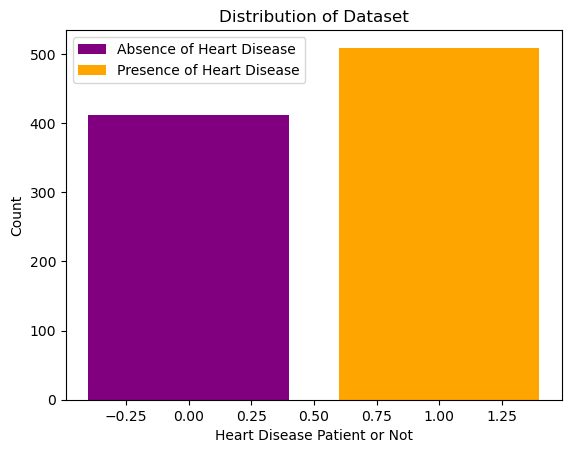

In [30]:
# Visualization of dataset distribution

counts = df['target'].value_counts().sort_index()
plt.bar(0, counts[0], color='purple', label='Absence of Heart Disease')
plt.bar(1, counts[1], color='orange', label='Presence of Heart Disease')
plt.title("Distribution of Dataset")
plt.xlabel("Heart Disease Patient or Not")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.show()

In [31]:
# Demographic Insights

# Finding age range of patients in the dataset
min_age = df['age'].min()
max_age = df['age'].max()
print(f"The age range of patients is {min_age} to {max_age}.")

# Finding gender distribution
gender_dist = df["sex"].value_counts()

print ("The count of male and female patients is:\n", gender_dist)

The age range of patients is 28 to 77.
The count of male and female patients is:
 Male      726
Female    194
Name: sex, dtype: int64


In [32]:
# Health Metrics
stats = {
    "Feature": ["Resting Blood Pressure (trestbps)", "Serum Cholesterol (chol)", "Maximum Heart Rate (thalch)"],
    "Mean": [df['trestbps'].mean(), df['chol'].mean(), df['thalch'].mean()],
    "Median": [df['trestbps'].median(), df['chol'].median(), df['thalch'].median()]
}

stats_df = pd.DataFrame(stats)
stats_df

,Feature,Mean,Median
0,Resting Blood Pressure (trestbps),131.995652,130.0
1,Serum Cholesterol (chol),199.908696,223.0
2,Maximum Heart Rate (thalch),137.692391,140.0


In [33]:
# Categorical Features
print("Count of Patients with Exercise-Induced Angina:", df['exang'].sum())

# Count of different chest pain types
cp_counts = df['cp'].value_counts()
print("\nCount of Different Chest Pain Types:")
print(cp_counts)

Count of Patients with Exercise-Induced Angina: 337

Count of Different Chest Pain Types:
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64


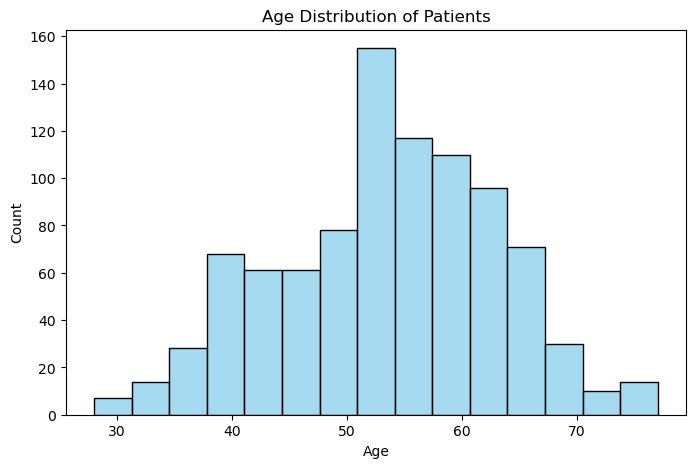

In [34]:
# Plot histogram for age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

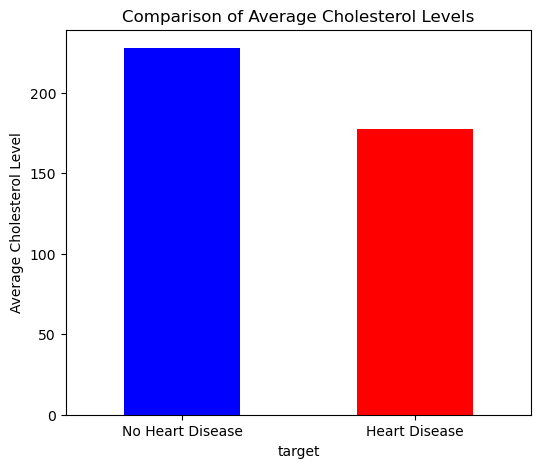

In [35]:
# Group by heart disease presence (num > 0 means heart disease is present)
cholesterol_means = df.groupby(df['target'])['chol'].mean()

# Bar plot for average cholesterol levels
plt.figure(figsize=(6,5))
cholesterol_means.plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.ylabel("Average Cholesterol Level")
plt.title("Comparison of Average Cholesterol Levels")
plt.show()

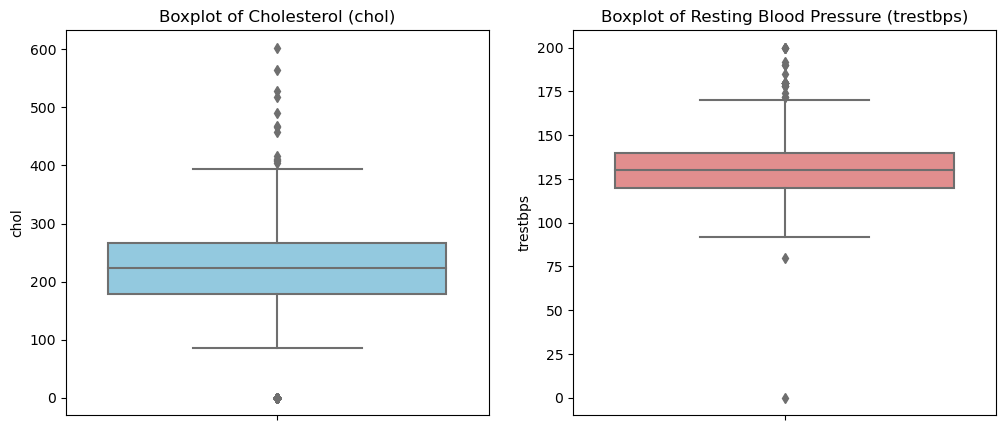

In [36]:
# Box plot to identify outliers
plt.figure(figsize=(12,5))

# Boxplot for cholesterol (chol)
plt.subplot(1,2,1)
sns.boxplot(y=df['chol'], color='skyblue')
plt.title("Boxplot of Cholesterol (chol)")

# Boxplot for resting blood pressure (trestbps)
plt.subplot(1,2,2)
sns.boxplot(y=df['trestbps'], color='lightcoral')
plt.title("Boxplot of Resting Blood Pressure (trestbps)")

plt.show()